## Change sys.path to use my tensortrade instead of the one in env

In [1]:
import sys
sys.path.append("/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader")
print(sys.path)

['/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/opt/python/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/IPython/extensions', '/Users/jasonfiacco/.ipython', '/Users/jasonfiacco/Documents/Yale/Senior/thesis/deeptrader']


## Read PredictIt Data Instead

In [2]:
import ssl
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context # Only used if pandas gives a SSLError

def fetch_data(symbol):
    path = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/predictit_datasets/"
    filename = "{}.xlsx".format(symbol)



    df = pd.read_excel(path + filename, skiprows=4)
    df = df.set_index("Date")
    df = df.drop(df.columns[[7,8,9]], axis=1)
    df = df.drop("ID", 1)
    df.columns = [symbol + ":" + name.lower() for name in df.columns]

    return df

In [3]:
all_data = pd.concat([
    fetch_data("WARREN"),
    fetch_data("CRUZ"),
    fetch_data("MANCHIN"),
    fetch_data("SANDERS"),
    fetch_data("NELSON"),
    fetch_data("DONNELLY"),
    fetch_data("PELOSI"),
    fetch_data("MANAFORT"),
    fetch_data("BROWN"),
    fetch_data("RYAN"),
    fetch_data("STABENOW")
], axis=1)
all_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
11/13/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/14/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/15/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/16/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0
11/17/2016,NaN,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,0,0.0


## Plot the closing prices for all the markets

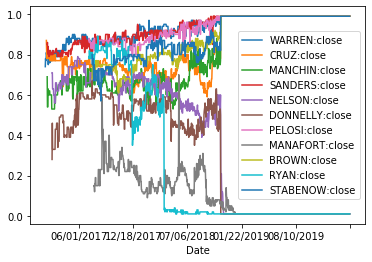

In [4]:
%matplotlib inline
closing_prices = all_data.loc[:, [("close" in name) for name in all_data.columns]]
closing_prices.plot()

## Slice just a specific time period from the dataframe

In [5]:
all_data.index = pd.to_datetime(all_data.index)

In [6]:
subset_data = all_data[(all_data.index >= '09-01-2017') & (all_data.index <= '09-04-2020')]
subset_data.head()

,WARREN:open,WARREN:low,WARREN:high,WARREN:close,WARREN:volume,WARREN:average,CRUZ:open,CRUZ:low,CRUZ:high,CRUZ:close,...,RYAN:high,RYAN:close,RYAN:volume,RYAN:average,STABENOW:open,STABENOW:low,STABENOW:high,STABENOW:close,STABENOW:volume,STABENOW:average
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,0.85,0.85,0.85,0.85,0,0.0000,0.77,0.77,0.78,0.78,...,0.82,0.82,0,0.0000,0.72,0.69,0.72,0.70,16,0.6981
2017-09-02,0.85,0.85,0.85,0.85,0,0.0000,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.70,0.70,45,0.7000
2017-09-03,0.85,0.84,0.85,0.84,74,0.8400,0.78,0.78,0.78,0.78,...,0.82,0.82,0,0.0000,0.70,0.70,0.72,0.72,1,0.7200
2017-09-04,0.84,0.84,0.85,0.85,10,0.8500,0.78,0.78,0.78,0.78,...,0.82,0.81,120,0.8100,0.72,0.72,0.72,0.72,0,0.0000
2017-09-05,0.85,0.84,0.85,0.84,43,0.8479,0.78,0.78,0.78,0.78,...,0.87,0.81,52,0.8619,0.72,0.72,0.72,0.72,9,0.7200


## Define Exchanges

An exchange needs a name, an execution service, and streams of price data in order to function properly.

The setups supported right now are the simulated execution service using simulated or stochastic data. More execution services will be made available in the future, as well as price streams so that live data and execution can be supported.

In [7]:
from tensortrade.exchanges import Exchange
from tensortrade.exchanges.services.execution.simulated import execute_order
from tensortrade.data import Stream

#Exchange(name of exchange, service)
#It looks like each Stream takes a name, and then a list of the closing prices.

predictit_exch = Exchange("predictit", service=execute_order)(
    Stream("USD-WARREN", list(subset_data['WARREN:close'])),
    Stream("USD-CRUZ", list(subset_data['CRUZ:close'])),
    Stream("USD-MANCHIN", list(subset_data['MANCHIN:close'])),
    Stream("USD-SANDERS", list(subset_data['SANDERS:close'])),
    Stream("USD-NELSON", list(subset_data['NELSON:close'])),
    Stream("USD-DONNELLY", list(subset_data['DONNELLY:close'])),
    Stream("USD-PELOSI", list(subset_data['PELOSI:close'])),
    Stream("USD-MANAFORT", list(subset_data['MANAFORT:close'])),
    Stream("USD-BROWN", list(subset_data['BROWN:close'])),
    Stream("USD-RYAN", list(subset_data['RYAN:close'])),
    Stream("USD-STABENOW", list(subset_data['STABENOW:close']))
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:



Now that the exchanges have been defined we can define our features that we would like to include, excluding the prices we have provided for the exchanges.

## Define External Data Feed

Here we will define the external feed to use whatever data you would like. From financial indicators to datasets that have nothing to do with instrument prices, they will all have to be defined and incorporated into the external data feed provided to the environment. There is also an internal data feed that is used to collect data on all the wallets and the net worth of the portfolio. You can choose to include this or not by using the `use_internal` parameter of the trading environment.

In [6]:
#This is where we can add other features like technical analysis to help our agent. 
#This is where you would add news.

#Import ta, which is a technical analysis finance package.
import ta
from tensortrade.data import DataFeed, Module

# Add all features for coinbase bitcoin
#First subset the full dataframe to get just data for BTC, and then just data for ETH
coinbase_btc = coinbase_data.loc[:, [name.startswith("BTC") for name in coinbase_data.columns]]
coinbase_eth = coinbase_data.loc[:, [name.startswith("ETH") for name in coinbase_data.columns]]

#Now add all the TA extra features for bitcoin.
ta.add_all_ta_features(
    coinbase_btc,
    colprefix="BTC:",
    **{k: "BTC:" + k for k in ['open', 'high', 'low', 'close', 'volume']}
)

#Add streams for all the other columns, not just Closing prices like we did for the Exchange.
#This time we are adding "Streams" for "High", "Low", "OBV, "CMB", NVI, etc. to a "Feed" instead
#of an "Exchange"
with Module("coinbase") as coinbase_ns:
    coinbase_nodes = [Stream(name, list(coinbase_btc[name])) for name in coinbase_btc.columns]
    coinbase_nodes += [Stream(name, list(coinbase_eth[name])) for name in coinbase_eth.columns]


feed = DataFeed([coinbase_ns])

NameError: name 'coinbase_data' is not defined

In [ ]:
feed.next()

### Doing it without adding other features. Just use price 

In [8]:
#You still have to add "Streams" for all the standard columns open, high, low, close, volume in this case
from tensortrade.data import DataFeed, Module

with Module("predictit") as predictit_ns:
    predictit_nodes = [Stream(name, list(subset_data[name])) for name in subset_data.columns]
    

In [9]:
#Then create the Feed from it
feed = DataFeed([predictit_ns])
feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

## Portfolio

Make the portfolio using the any combinations of exchanges and intruments that the exchange supports

In [10]:
#I am going to have to add "instruments" for all 25 of the PredictIt markets I'm working with.
from tensortrade.instruments import USD, WARREN, CRUZ, MANCHIN, SANDERS, NELSON, DONNELLY,\
                                PELOSI, MANAFORT, BROWN, RYAN, STABENOW
from tensortrade.wallets import Wallet, Portfolio

portfolio = Portfolio(USD, [
    Wallet(predictit_exch, 10000 * USD),
    Wallet(predictit_exch, 0 * WARREN),
    Wallet(predictit_exch, 0 * CRUZ),
    Wallet(predictit_exch, 0 * MANCHIN),
    Wallet(predictit_exch, 0 * SANDERS),
    Wallet(predictit_exch, 0 * NELSON),
    Wallet(predictit_exch, 0 * DONNELLY),
    Wallet(predictit_exch, 0 * PELOSI),
    Wallet(predictit_exch, 0 * MANAFORT),
    Wallet(predictit_exch, 0 * BROWN),
    Wallet(predictit_exch, 0 * RYAN),
    Wallet(predictit_exch, 0 * STABENOW)
])

## Environment

In [11]:
from tensortrade.environments import TradingEnvironment

env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='simple',
    reward_scheme='simple',
    window_size=15,
    enable_logger=False,
    renderers = 'screenlog'
)

/Users/jasonfiacco/Documents/Yale/Senior/thesis/env/lib/python3.6/site-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



In [12]:
env.feed.next()

{'predictit:/WARREN:open': 0.85,
 'predictit:/WARREN:low': 0.85,
 'predictit:/WARREN:high': 0.85,
 'predictit:/WARREN:close': 0.85,
 'predictit:/WARREN:volume': 0,
 'predictit:/WARREN:average': 0.0,
 'predictit:/CRUZ:open': 0.77,
 'predictit:/CRUZ:low': 0.77,
 'predictit:/CRUZ:high': 0.78,
 'predictit:/CRUZ:close': 0.78,
 'predictit:/CRUZ:volume': 940,
 'predictit:/CRUZ:average': 0.7744,
 'predictit:/MANCHIN:open': 0.68,
 'predictit:/MANCHIN:low': 0.68,
 'predictit:/MANCHIN:high': 0.71,
 'predictit:/MANCHIN:close': 0.71,
 'predictit:/MANCHIN:volume': 185,
 'predictit:/MANCHIN:average': 0.6804,
 'predictit:/SANDERS:open': 0.85,
 'predictit:/SANDERS:low': 0.85,
 'predictit:/SANDERS:high': 0.85,
 'predictit:/SANDERS:close': 0.85,
 'predictit:/SANDERS:volume': 0,
 'predictit:/SANDERS:average': 0.0,
 'predictit:/NELSON:open': 0.72,
 'predictit:/NELSON:low': 0.72,
 'predictit:/NELSON:high': 0.72,
 'predictit:/NELSON:close': 0.72,
 'predictit:/NELSON:volume': 0,
 'predictit:/NELSON:average': 

#### ^An environment doesn't just show the OHLCV for each instrument. It also shows free, locked, total, as well as "USD_BTC"

## Use the ledger to debug

In [14]:
done = False
while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    


In [16]:
portfolio.ledger.as_frame().head(20)

,step,exchange_name,instrument,operation,poid,memo,amount,free,locked
0,0,predictit,USD,WITHDRAW,None,REMOVE FOR ALLOCATION,9000.00 USD,1000.00 USD,0.00 USD
1,0,predictit,USD,DEPOSIT,18f2e2b0-4ca3-4a8c-ba94-f47c4eaa3048,LOCK FOR ORDER,9000.00 USD,1000.00 USD,9000.00 USD
2,0,predictit,USD,WITHDRAW,18f2e2b0-4ca3-4a8c-ba94-f47c4eaa3048,COMMISSION FOR BUY,27.00 USD,1000.00 USD,8973.00 USD
3,0,predictit,USD,WITHDRAW,18f2e2b0-4ca3-4a8c-ba94-f47c4eaa3048,REMOVE FROM LOCKED TO FILL ORDER,8973.00 USD,1000.00 USD,0.00 USD
4,0,predictit,RYAN,DEPOSIT,18f2e2b0-4ca3-4a8c-ba94-f47c4eaa3048,BOUGHT @ 0.82 USD/RYAN,10942.68 RYAN,0.00 RYAN,10942.68 RYAN
5,0,predictit,USD,DEPOSIT,None,COMPLETE ORDER (RELEASE USD),0.00 USD,1000.00 USD,0.00 USD
6,0,predictit,RYAN,DEPOSIT,None,COMPLETE ORDER (RELEASE RYAN),10942.68 RYAN,10942.68 RYAN,0.00 RYAN
7,2,predictit,USD,WITHDRAW,None,REMOVE FOR ALLOCATION,800.00 USD,200.00 USD,0.00 USD
8,2,predictit,USD,DEPOSIT,d52b5945-09ea-4cb6-8096-2ad543aa62cb,LOCK FOR ORDER,800.00 USD,200.00 USD,800.00 USD
9,2,predictit,USD,WITHDRAW,d52b5945-09ea-4cb6-8096-2ad543aa62cb,COMMISSION FOR BUY,2.40 USD,200.00 USD,797.60 USD


### Make and train the agent

In [13]:
from tensortrade.agents import DQNAgent

agent = DQNAgent(env)
agent.train(n_episodes=100, n_steps=700, render_interval=100, save_path="./saved_agents/")

====      AGENT ID: 1c470e68-1346-4a0e-830a-7a07c0dbfb1d      ====
[2020-03-02 9:50:57 PM] Episode: 1/100 Step: 200/700
[2020-03-02 9:51:13 PM] Episode: 1/100 Step: 300/700
[2020-03-02 9:51:29 PM] Episode: 1/100 Step: 400/700


InvalidArgumentError: cannot compute Conv2D as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:Conv2D] name: sequential/conv1d/conv1d/

## Restoring an already existing agent

In [ ]:
agent.restore("./saved_agents/policy_network__7aaa7d4b-bbeb-4900-ac6b-7bcf84dfd63a__001.hdf5")

## Plot

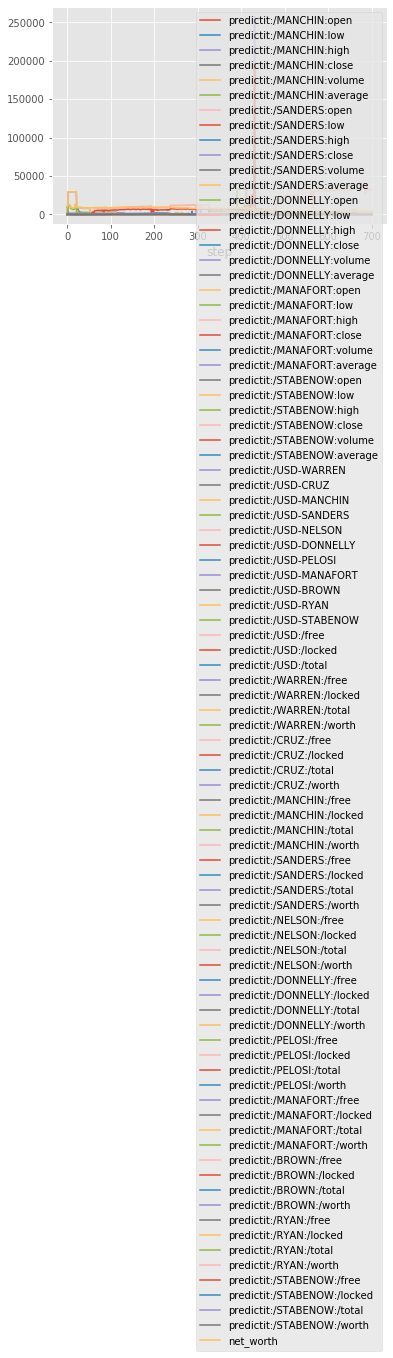

In [30]:
%matplotlib inline

portfolio.performance.plot()

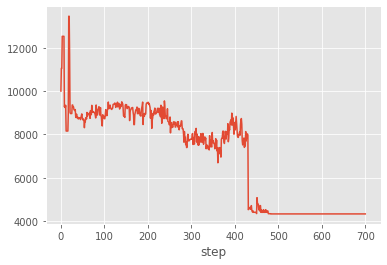

In [31]:
portfolio.performance.net_worth.plot()

In [33]:
portfolio.performance.head()

,predictit:/MANCHIN:open,predictit:/MANCHIN:low,predictit:/MANCHIN:high,predictit:/MANCHIN:close,predictit:/MANCHIN:volume,predictit:/MANCHIN:average,predictit:/SANDERS:open,predictit:/SANDERS:low,predictit:/SANDERS:high,predictit:/SANDERS:close,...,predictit:/RYAN:/free,predictit:/RYAN:/locked,predictit:/RYAN:/total,predictit:/RYAN:/worth,predictit:/STABENOW:/free,predictit:/STABENOW:/locked,predictit:/STABENOW:/total,predictit:/STABENOW:/worth,net_worth,base_symbol
step,,,,,,,,,,,,,,,,,,,,,
0,0.68,0.68,0.71,0.71,185,0.6804,0.85,0.85,0.85,0.85,...,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,10000.000000,USD
1,0.71,0.71,0.71,0.71,0,0.0000,0.85,0.85,0.85,0.85,...,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,11047.619048,USD
2,0.71,0.71,0.71,0.71,0,0.0000,0.85,0.85,0.85,0.85,...,0.0,0,0.0,0.0,0.000000,0,0.000000,0.0,11047.619048,USD
3,0.71,0.71,0.71,0.71,0,0.0000,0.85,0.85,0.85,0.85,...,0.0,0,0.0,0.0,444.444444,0,444.444444,320.0,12523.809524,USD
4,0.71,0.67,0.71,0.67,50,0.6700,0.85,0.85,0.87,0.87,...,0.0,0,0.0,0.0,444.444444,0,444.444444,320.0,12523.809524,USD


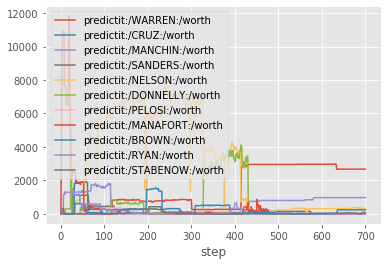

In [37]:
#Plot the total balance in each type of item
p = portfolio.performance
p2 = p.iloc[:, :]
weights = p2.loc[:, [("/worth" in name) for name in p2.columns]]
weights.iloc[:, :].plot()


## Try Plotly Render too

In [ ]:
from tensortrade.environments.render import PlotlyTradingChart
from tensortrade.environments.render import FileLogger

chart_renderer = PlotlyTradingChart(
    height = 800
)

file_logger = FileLogger(
    filename='example.log',  # omit or None for automatic file name
    path='training_logs'  # create a new directory if doesn't exist, None for no directory
)

In [ ]:
price_history.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']

In [ ]:
env = TradingEnvironment(
    feed=feed,
    portfolio=portfolio,
    action_scheme='managed-risk',
    reward_scheme='risk-adjusted',
    window_size=20,
    price_history=price_history,
    renderers = [chart_renderer, file_logger]
)

In [ ]:
from tensortrade.agents import DQNAgent

agent = DQNAgent(env)
agent.train(n_episodes=1, n_steps=1000, render_interval=1)

## Extra Stuff

In [ ]:
apath = "/Users/jasonfiacco/Documents/Yale/Senior/thesis/jasonfiacco-selectedmarkets-mytickers.xlsx"
df = pd.read_excel(apath, skiprows=2)
jason_tickers = df.iloc[:, 5].tolist()
descriptions = df.iloc[:, 1].tolist()

for ticker, description in zip(jason_tickers, descriptions):
    l = "{} = Instrument(\'{}\', 2, \'{}\')".format(ticker, ticker, description)
    print(l)